In [66]:
# 我们着重讨论不同区域的显著性影响因素
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv("C:/Users/86187/Desktop/新加坡国立大学暑期学校相关文件/data_cleaned.csv")
data.describe()

Lng            Lat           Cid            DOM  \
count  297597.000000  297597.000000  2.975970e+05  152184.000000   
mean      116.418767      39.949761  1.126275e+12      29.469701   
std         0.110999       0.091533  1.331619e+12      50.394467   
min       116.072514      39.627030  1.111030e+12       1.000000   
25%       116.345863      39.893200  1.111030e+12       1.000000   
50%       116.416780      39.934530  1.111030e+12       7.000000   
75%       116.476921      40.003156  1.111030e+12      38.000000   
max       116.711337      40.252758  1.184870e+14    1677.000000   

           followers          price     livingRoom    drawingRoom  \
count  297597.000000  297597.000000  297597.000000  297597.000000   
mean        0.015039       0.391045       2.011102       1.171107   
std         0.030417       0.178332       0.764922       0.512581   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.258747       1.000000       1.000000   
50%         0.004374       0.357607       2.000000       1.000000   
75%         0.016623       0.485556       2.000000       1.000000   
max         1.000000       1.000000       8.000000       5.000000   

             kitchen       bathRoom  ...  buildingStructure    ladderRatio  \
count  297597.000000  297597.000000  ...      297597.000000  297597.000000   
mean        0.995131       1.182351  ...           4.421473       0.381856   
std         0.100335       0.423099  ...           1.907456       0.176411   
min         0.000000       0.000000  ...           1.000000       0.014000   
25%         1.000000       1.000000  ...           2.000000       0.250000   
50%         1.000000       1.000000  ...           6.000000       0.333000   
75%         1.000000       1.000000  ...           6.000000       0.500000   
max         3.000000       7.000000  ...           6.000000       5.000000   

            elevator         subway       district  communityAverage  \
count  297597.000000  297597.000000  297597.000000     297597.000000   
mean        0.570624       0.602388       6.748516      63696.710585   
std         0.494988       0.489405       2.811945      22153.499402   
min         0.000000       0.000000       1.000000      10847.000000   
25%         0.000000       0.000000       6.000000      46505.000000   
50%         1.000000       1.000000       7.000000      59025.000000   
75%         1.000000       1.000000       8.000000      75858.000000   
max         1.000000       1.000000      13.000000     183109.000000   

       tradeTimeModefiy  Original_price  Original_followers  attractiveness  
count     297597.000000   297597.000000       297597.000000   297597.000000  
mean      735621.421896    42715.008611           17.189713        0.391045  
std          597.390522    19476.512214           34.766471        0.178332  
min       734046.000000        7.000000            0.000000        0.000000  
25%       735124.000000    28266.000000            0.000000        0.258747  
50%       735769.000000    39063.000000            5.000000        0.357607  
75%       736091.000000    53037.000000           19.000000        0.485556  
max       736628.000000   109222.000000         1143.000000        1.000000  

[8 rows x 24 columns]

In [68]:
data.shape

(297597, 25)

In [69]:
data['totalRoom'] = data['livingRoom'] + data['drawingRoom'] + data['kitchen'] + data['bathRoom']
data['houseAge'] = data['tradeTimeModefiy']//365 - data['constructionTime']
data['houseCondition'] = data['renovationCondition'] + data['subway'] + data['elevator'] 

In [70]:
import folium
# 创建地图对象，设置初始位置和缩放级别
m = folium.Map(location=[39.906217, 116.3912757], zoom_start=13)
# 在地图上添加一个标记点
folium.Marker([39.906217, 116.3912757], popup='Beijing').add_to(m)
display(m)

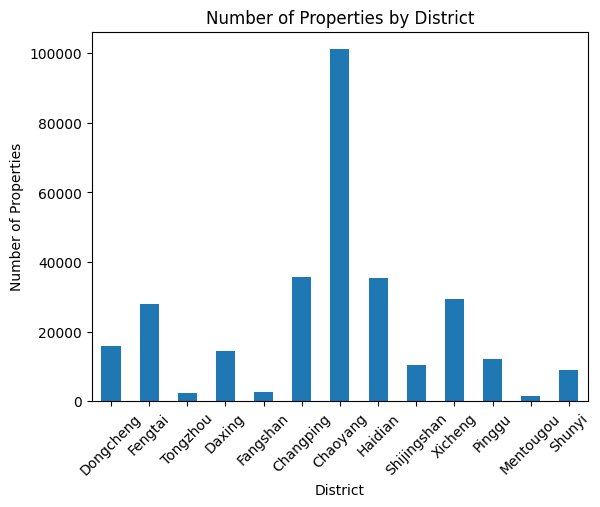

In [71]:
# 对district进行分组并计算每个区域的样本个数
district_counts = data.groupby('district').size()
# 绘制柱状图
district_counts.plot(kind='bar')

plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by District')
plt.xticks(range(len(district_counts)), ['Dongcheng', 'Fengtai', 'Tongzhou', 'Daxing', 'Fangshan', 'Changping', 'Chaoyang', 'Haidian', 'Shijingshan', 'Xicheng', 'Pinggu', 'Mentougou', 'Shunyi'], rotation=45)
plt.show()

In [72]:
# 我们分区块研究影响房价的显著因素
# 东城区
from folium.plugins import MarkerCluster
Daxing = data[data['district'] == 4]
map_center = [Daxing.iloc[0]['Lat'], Daxing.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 创建一个 MarkerCluster 对象
marker_cluster = MarkerCluster().add_to(m)
# 遍历为每个点添加标记到 MarkerCluster 中，而不是直接添加到地图上
for index, row in Daxing.iterrows():
    folium.Marker([row['Lat'], row['Lng']]).add_to(marker_cluster)
display(m)

In [73]:
from folium.plugins import HeatMap
# 东城区
# 我们先观察房屋价格在地理空间中的分布情况
map_center = [Daxing.iloc[0]['Lat']-0.03, Daxing.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 权重设置为每个点的price
heat_data = [[row['Lat'], row['Lng'], row['attractiveness']] for index, row in Daxing.iterrows()]
# 创建热度图并添加到地图上，使用price作为权重
HeatMap(heat_data,blur=4, radius=8).add_to(m)
m

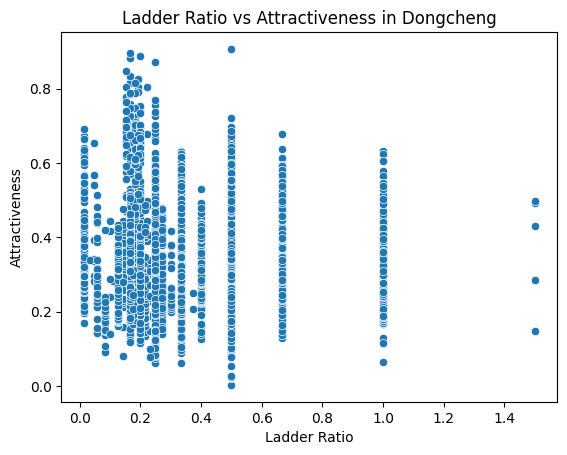

In [74]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
import seaborn as sns
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Daxing, x='ladderRatio', y='attractiveness')
plt.title('Ladder Ratio vs Attractiveness in Dongcheng')
plt.xlabel('Ladder Ratio')
plt.ylabel('Attractiveness')
plt.show()

In [75]:
# 计算ladderRatio和attractiveness之间的相关系数
correlation_matrix = Daxing[['ladderRatio', 'attractiveness']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 从相关系数的角度看一般条件下ladderRatio在东城区不是一个显著影响房屋吸引力的因素

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.109355
attractiveness    -0.109355        1.000000


In [76]:
# 我们再观察东城区的房价与楼层高度的关系
high_floor = Daxing[Daxing['floor'] > 10]
low_floor = Daxing[Daxing['floor'] <= 10]
print("东城区高层建筑共{high_floor}个，低层建筑共{low_floor}个,高层建筑占比为{high_floor_ratio:.2f}%".format(high_floor=len(high_floor), low_floor=len(low_floor), high_floor_ratio=len(high_floor)/len(Daxing)*100))

东城区高层建筑共4894个，低层建筑共9493个,高层建筑占比为34.02%


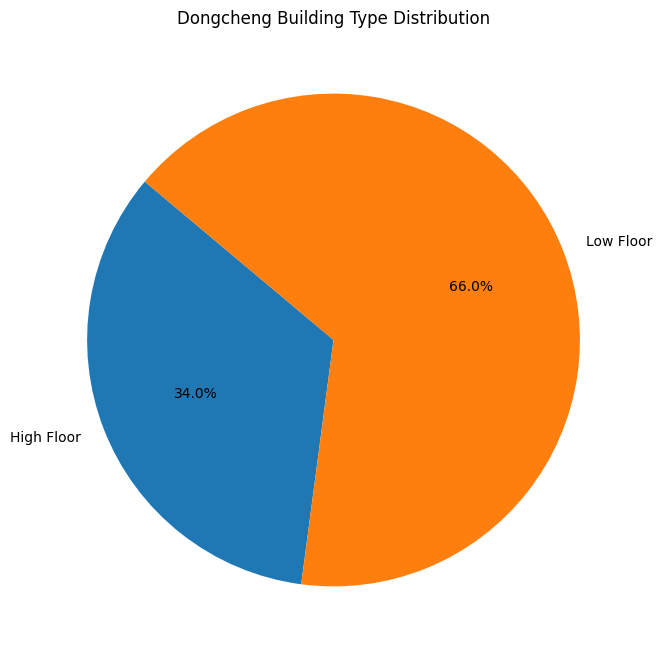

In [77]:
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie([len(high_floor), len(low_floor)], labels=['High Floor', 'Low Floor'], autopct='%1.1f%%', startangle=140)
plt.title('Dongcheng Building Type Distribution')
plt.show()

In [78]:
# 计算floor和attractivness之间的相关系数
correlation_matrix = Daxing[['floor', 'attractiveness']].corr()
print(correlation_matrix)

                   floor  attractiveness
floor           1.000000        0.328591
attractiveness  0.328591        1.000000


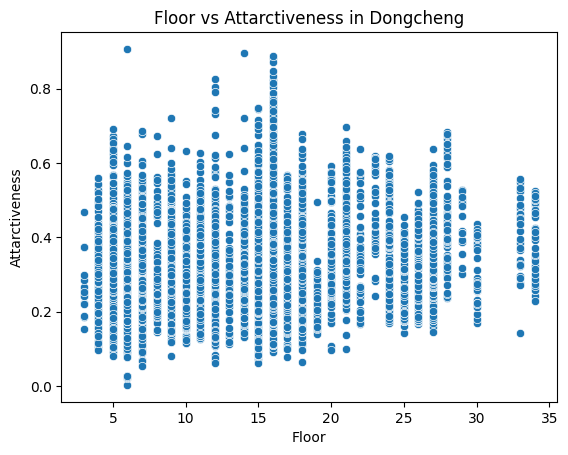

In [79]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Daxing, x='floor', y='attractiveness')
plt.title('Floor vs Attarctiveness in Dongcheng')
plt.xlabel('Floor')
plt.ylabel('Attarctiveness')
plt.show()

In [80]:
# 发现在东城区中整体上floor和房屋的受欢迎程度没有关联
# 计算在高层条件下ladderRatio和attractiveness之间的相关系数
correlation_matrix = high_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.039315
attractiveness    -0.039315        1.000000


In [81]:
correlation_matrix = low_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)
# 对于低层建筑, ladderRatio和attractiveness之间的关联性相较于高层建筑要更弱,虽然面对高层建筑时人们会考虑人均楼梯数目但总体来说不显著

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.109298
attractiveness    -0.109298        1.000000


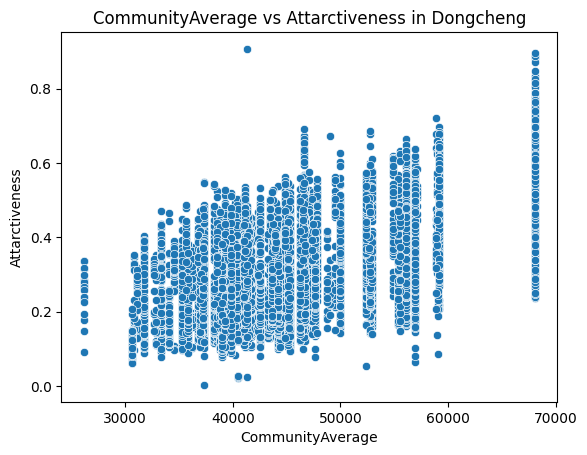

In [82]:
sns.scatterplot(data=Daxing, x='communityAverage', y='attractiveness')
plt.title('CommunityAverage vs Attarctiveness in Dongcheng')
plt.xlabel('CommunityAverage')
plt.ylabel('Attarctiveness')
plt.show()

In [83]:
# 研究communityAverage与attractiveness之间的关联度
correlation_matrix = Daxing[['communityAverage', 'attractiveness']].corr()
print(correlation_matrix)

                  communityAverage  attractiveness
communityAverage          1.000000        0.488533
attractiveness            0.488533        1.000000


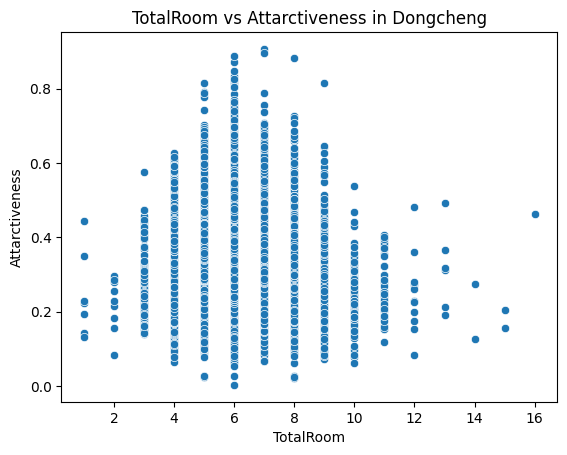

In [84]:
sns.scatterplot(data=Daxing, x='totalRoom', y='attractiveness')
plt.title('TotalRoom vs Attarctiveness in Dongcheng')
plt.xlabel('TotalRoom')
plt.ylabel('Attarctiveness')
plt.show()

In [85]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Daxing[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000        0.003111
attractiveness   0.003111        1.000000


In [86]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Daxing[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000        0.003111
attractiveness   0.003111        1.000000


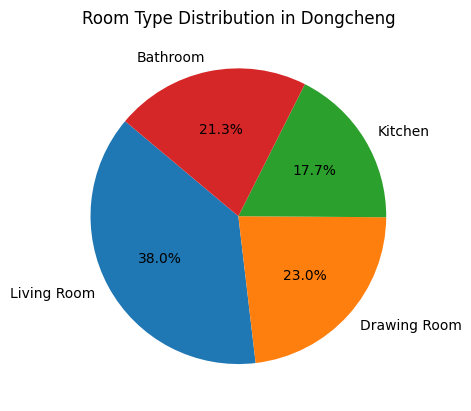

In [87]:
# 分别计算每种房间的总数
total_livingRoom = Daxing['livingRoom'].sum()
total_drawingRoom = Daxing['drawingRoom'].sum()
total_kitchen = Daxing['kitchen'].sum()
total_bathroom = Daxing['bathRoom'].sum()
# 将计算结果合并为一个新的Series
room_totals = pd.Series({
    'Living Room': total_livingRoom,
    'Drawing Room': total_drawingRoom,
    'Kitchen': total_kitchen,
    'Bathroom': total_bathroom
})
room_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution in Dongcheng')
plt.ylabel('')
plt.show()

In [88]:
# 我们从一般的角度出发研究房间类型对吸引力的影响
correlation_matrix = Daxing[['bathRoom','kitchen','drawingRoom','livingRoom' ,'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  livingRoom  attractiveness
bathRoom        1.000000  0.068257     0.493505    0.551701        0.083863
kitchen         0.068257  1.000000     0.082281    0.088707        0.014091
drawingRoom     0.493505  0.082281     1.000000    0.439915       -0.021750
livingRoom      0.551701  0.088707     0.439915    1.000000       -0.030126
attractiveness  0.083863  0.014091    -0.021750   -0.030126        1.000000


In [89]:
big_family = Daxing[Daxing['livingRoom'] >= 3]
# 我们再进一步研究大的家庭对不同种类房间的需求
correlation_matrix = big_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.045897     0.560186        0.087357
kitchen         0.045897  1.000000     0.040189        0.026727
drawingRoom     0.560186  0.040189     1.000000        0.006544
attractiveness  0.087357  0.026727     0.006544        1.000000


In [90]:
small_family = Daxing[Daxing['livingRoom'] < 3]
correlation_matrix = small_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.043408     0.205639        0.178104
kitchen         0.043408  1.000000     0.080218        0.011814
drawingRoom     0.205639  0.080218     1.000000       -0.011062
attractiveness  0.178104  0.011814    -0.011062        1.000000


In [91]:
# 交易时房龄对吸引力的影响
correlation_matrix = Daxing[['constructionTime','houseAge','attractiveness']].corr()
print(correlation_matrix)

                  constructionTime  houseAge  attractiveness
constructionTime          1.000000 -0.972289        0.356923
houseAge                 -0.972289  1.000000       -0.192122
attractiveness            0.356923 -0.192122        1.000000


In [92]:
correlation_matrix = Daxing[['houseCondition','houseAge','constructionTime','attractiveness']].corr()
print(correlation_matrix)

                  houseCondition  houseAge  constructionTime  attractiveness
houseCondition          1.000000 -0.154076          0.291296        0.460942
houseAge               -0.154076  1.000000         -0.972289       -0.192122
constructionTime        0.291296 -0.972289          1.000000        0.356923
attractiveness          0.460942 -0.192122          0.356923        1.000000


In [93]:
correlation_matrix = high_floor[['elevator','attractiveness']].corr()
print(correlation_matrix)

                elevator  attractiveness
elevator        1.000000        0.049955
attractiveness  0.049955        1.000000


C:\Users\86187\AppData\Local\Temp\ipykernel_12180\4092655068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daxing['buildingType'] = Daxing['buildingType'].map(type_mapping)


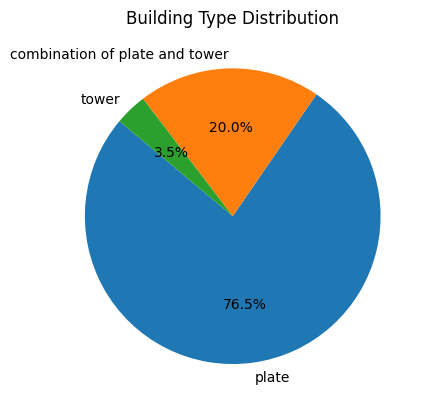

In [94]:
type_mapping = {
    1: 'tower',
    2: 'bungalow',
    3: 'combination of plate and tower',
    4: 'plate'
}
Daxing['buildingType'] = Daxing['buildingType'].map(type_mapping)
building_type_counts = Daxing['buildingType'].value_counts()
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Building Type Distribution')
plt.ylabel('')
plt.show()

buildingType
combination of plate and tower    0.317861
tower                             0.304747
plate                             0.263912
Name: attractiveness, dtype: float64


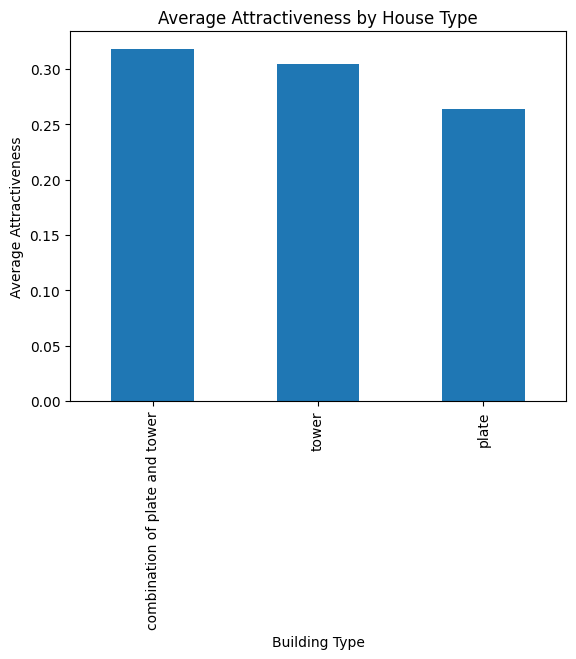

In [95]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Daxing.groupby('buildingType')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by House Type')
plt.xlabel('Building Type')
plt.ylabel('Average Attractiveness')
plt.show()

In [96]:
Daxing= Daxing[Daxing['buildingStructure']!=1]
Daxing['buildingStructure']

65        2
80        6
106       2
108       6
109       2
         ..
297523    2
297531    6
297557    2
297564    2
297580    2
Name: buildingStructure, Length: 14387, dtype: int64

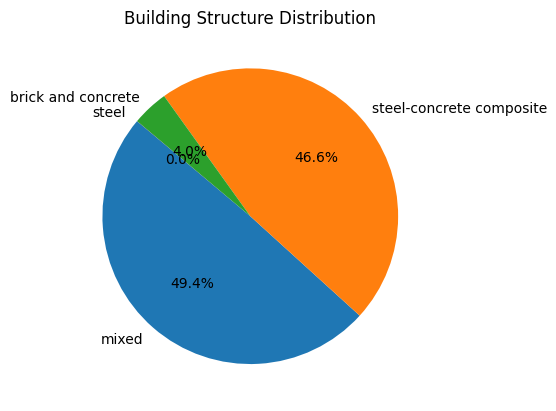

In [97]:
type_mapping = {
    2:"mixed",
    3:"brick and wood", 
    4:"brick and concrete", 
    5:"steel", 
    6:"steel-concrete composite"
}
Daxing['buildingStructure'] = Daxing['buildingStructure'].map(type_mapping)
building_type_counts = Daxing['buildingStructure'].value_counts()
explode_values = (0, 0, 0.3, 0.2, 0.1)
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Building Structure Distribution')
plt.ylabel('')
plt.show()

buildingStructure
steel-concrete composite    0.314775
mixed                       0.243970
brick and concrete          0.221917
steel                       0.172449
Name: attractiveness, dtype: float64


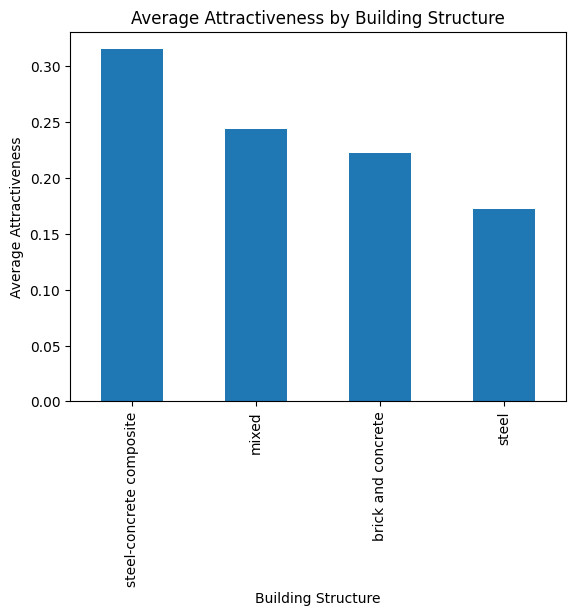

In [98]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Daxing.groupby('buildingStructure')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by Building Structure')
plt.xlabel('Building Structure')
plt.ylabel('Average Attractiveness')
plt.show()